# Customer Segmentation

# Problem Statement

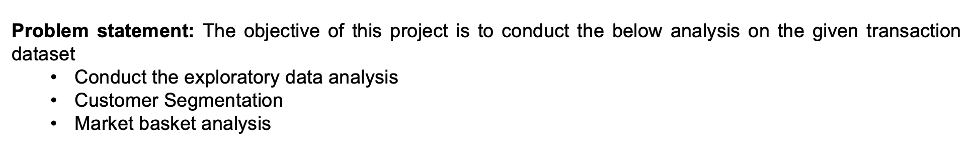

## PART A of Problem Statement
## Conducting the EXPLORATORY DATA ANALYSIS

The objective of this notebook is to cover the first part of problem statement which is the exploratory data analysis.

# Dataset and Attribute Information

Source - https://archive.ics.uci.edu/ml/datasets/Online+Retail

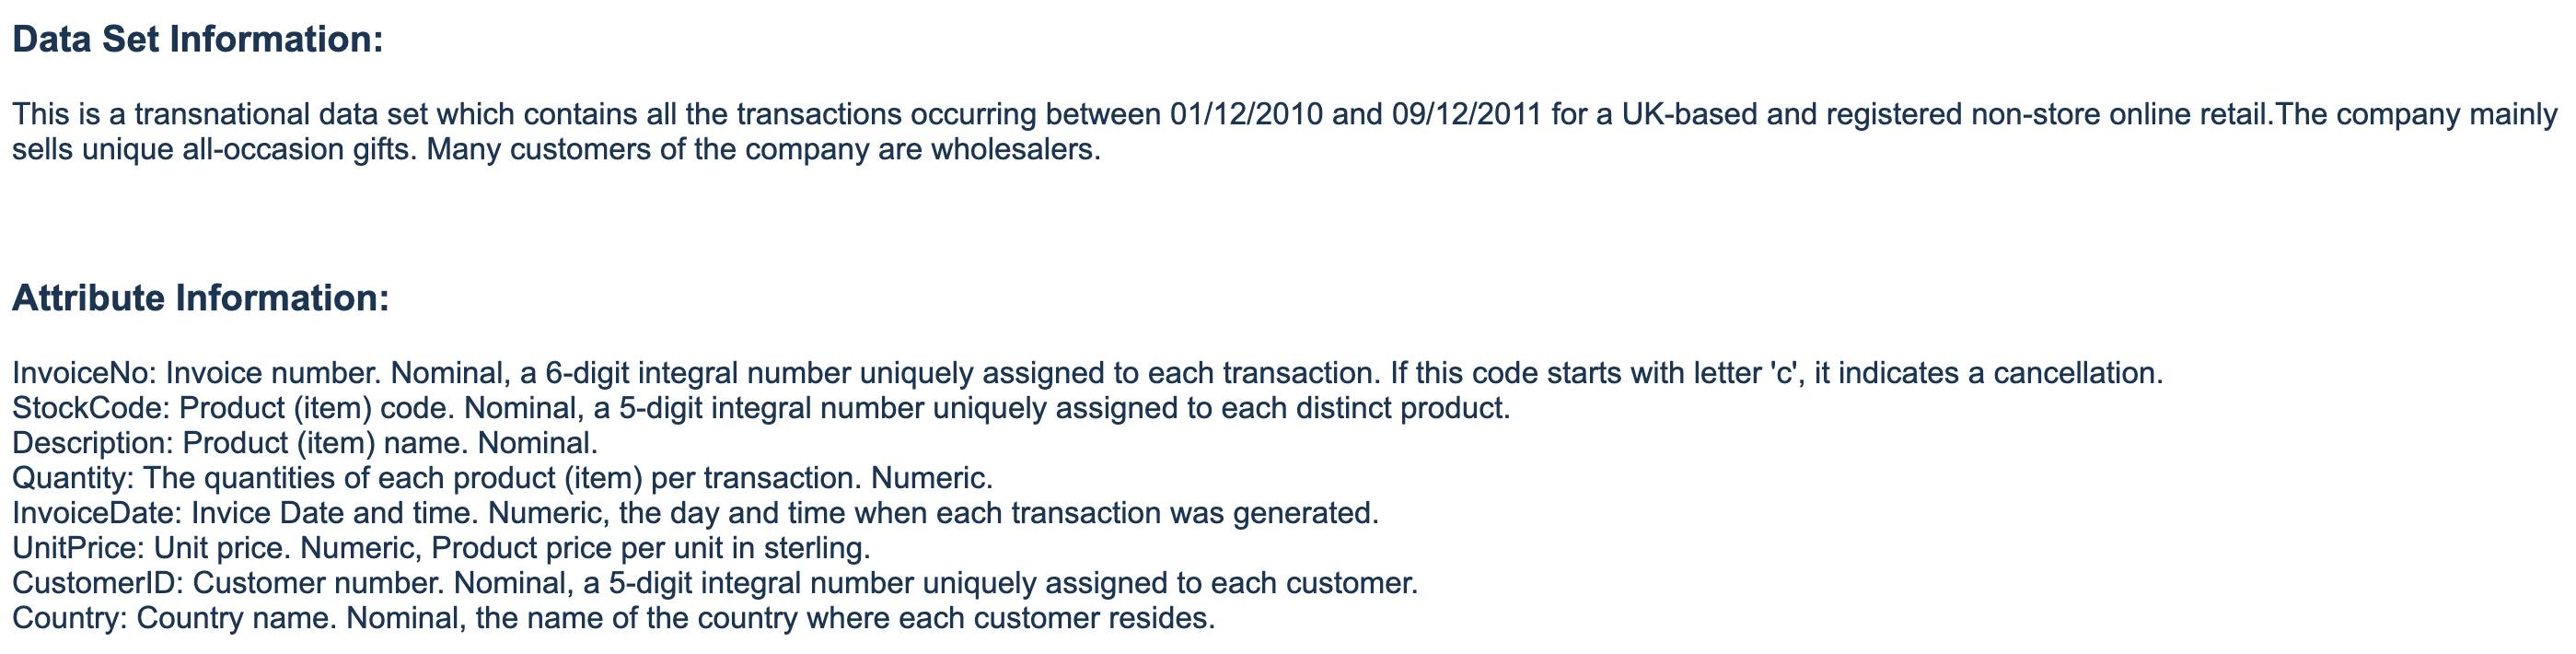

# Solution

# 1. Data Cleaning

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# Read data file

data = pd.read_csv('/Users/sylvia/Desktop/datasets/Online_Retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom


In [3]:
# Basic info about dataset

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Basic dataset Information**

**1. <font color=blue>Shape** - Our dataset is composed of **541909** rows and **8** columns. 


**2. <font color=blue>Missing values** - When going through the columns, we notice that we have some missing values in the **CustomerID** column, as it only has **406829** values. Also the column **Description** has missing values. So, that should be considered when applying exploration to our dataset. 


**3. <font color=blue>Datatypes** - When going through datatypes of columns, we see **InvoiceDate** is detected as Object, we need to **change to datetime object**. Also need to investigate as why **InvoiceNo** detected as object although it seems 6 digit integer code. **CustomerID** can be changed to alphanumeric instead of numeric.

In [4]:
# Column names
print(data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [5]:
# Unique Values

print("Number of transactions: ", data['InvoiceNo'].nunique())
print("Number of products: ",data['StockCode'].nunique())
print("Number of customers:", data['CustomerID'].nunique() )
print("Percentage of customers NA: ", 
      round(data['CustomerID'].isnull().sum() * 100 / len(data),2),"%" )
print('Number of countries: ',data['Country'].nunique())
    

Number of transactions:  25900
Number of products:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**Note:** The number of NA customers is quite large and that would impact the results.

In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

earliest_date = min(data['InvoiceDate'])
latest_date = max(data['InvoiceDate'])

print('Earliest date:', earliest_date)
print('Last date:', latest_date)
print(data['InvoiceDate'].dtype)


Earliest date: 2010-01-12 08:26:00
Last date: 2011-12-10 17:19:00
datetime64[ns]


Data is from Jan 2010 to Dec 2011 as per earliest and most recent date

In [7]:
# Missing values

missing_values = data.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Check for non-numeric values in InvoiceNo
data['InvoiceNo_chk'] = data['InvoiceNo'].str.isnumeric()
Invoice_rec = data[(data['InvoiceNo_chk'] == False)]
#data['InvoiceNo_chk'] = data[(data['InvoiceNo_chk'] == False)]

In [9]:
del data['InvoiceNo_chk']

In [10]:
print('Total non-numeric invoice numbers = ',len(Invoice_rec))
Invoice_rec.head(3)

Total non-numeric invoice numbers =  9291


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo_chk
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,False
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom,False
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom,False


In [11]:
#Get cancelled transactions

cancelled_orders = Invoice_rec[Invoice_rec['InvoiceNo'].astype(str).str.contains('C')]
len(cancelled_orders)

9288

In [12]:
cancelled_orders.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo_chk
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,False
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom,False
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom,False


Now, let's have an idea about the quantitative data (Quantity & UnitPrice).

In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The first thing to notice is that we have some negative values in our dataset. Maybe, this could mean that these quantities (with corresponding UnitPrice values) was returned or cancelled. As seen above we also have some InvoiceNo which starts with C, are most likely cancelled orders.


In [14]:
#Search for transaction where quantity == -80995
Invoice_rec[Invoice_rec['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo_chk
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-09-12 09:27:00,2.08,16446.0,United Kingdom,False


For cancelled orders we have quantity in negative. We check for any other orders in non-numeric category where quantity is non-negative. We see there are 3 records only, these are adjusted invoices.

In [15]:
Invoice_rec[Invoice_rec['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNo_chk
299982,A563185,B,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,NaN,United Kingdom,False
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,NaN,United Kingdom,False
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,NaN,United Kingdom,False


In [16]:
#Get adjusted transactions

adjusted_orders = Invoice_rec[Invoice_rec['InvoiceNo'].astype(str).str.contains('A')]
len(adjusted_orders)


3

Hence out of 9291 total orders we have 9288 cancelled orders and 3 adjusted orders.

## 1.1 Cancelled Orders

## What percentage of cancelled orders we have out of total transactions? 



In [17]:
print("Number of transactions: ", data['InvoiceNo'].nunique())
print('Cancelled orders:', len(cancelled_orders))

cancel_prcnt = (len(cancelled_orders)/data['InvoiceNo'].nunique())*100
print("Percent of cancelled orders:",round(cancel_prcnt,2))

Number of transactions:  25900
Cancelled orders: 9288
Percent of cancelled orders: 35.86


We have a large percentage of cancelled orders of 35%. Studying these cancelled orders may help in preventing future cancellation. Let's first get an overview of the general customers purchase behavior and then dig deeper.

## I.2 Explore Basket

### I.2.a) What's the average number of orders per customer?


In [18]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom


In [20]:
# orders will be known by unique invoice numbers generated for each customer

order_per_cus = data.groupby('CustomerID')['InvoiceNo'].nunique()

groupby_customer = pd.DataFrame(order_per_cus)

print('Total customers:',len(order_per_cus))
groupby_customer.head()

Total customers: 4372


,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [21]:
groupby_customer.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


As we see above average number of orders per customer are 5.

### I.2.b) What's the average number of unique items per order?

In [24]:
items_per_order = data.groupby('InvoiceNo')['StockCode'].nunique()

groupby_orders = pd.DataFrame(items_per_order)

print('Total orders:',len(items_per_order))
groupby_orders.head()

Total orders: 25900


,StockCode
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [25]:
groupby_orders.describe()

,StockCode
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


As we see above average number of unique items per order are 20.

### I.3) Explore Geography/market 

### I.3.a)  What's the total number of customers per country?

In [49]:
cust_per_country = data.groupby('Country')['CustomerID'].nunique().reset_index()

groupby_country = pd.DataFrame(cust_per_country).sort_values(by='CustomerID',
                                                             ascending=False)

tot_customers = data['CustomerID'].nunique()
print('Total customers:',tot_customers)
groupby_country


Total customers: 4372


,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


We see mojor chunk of customers is from United Kingdom which is 3940 out of total customer base of 4372.

In [33]:
percent_UK = (3950/tot_customers)*100
round(percent_UK,2)

90.35

We see that out of total 38 countries,  90% of customers are from UK only.

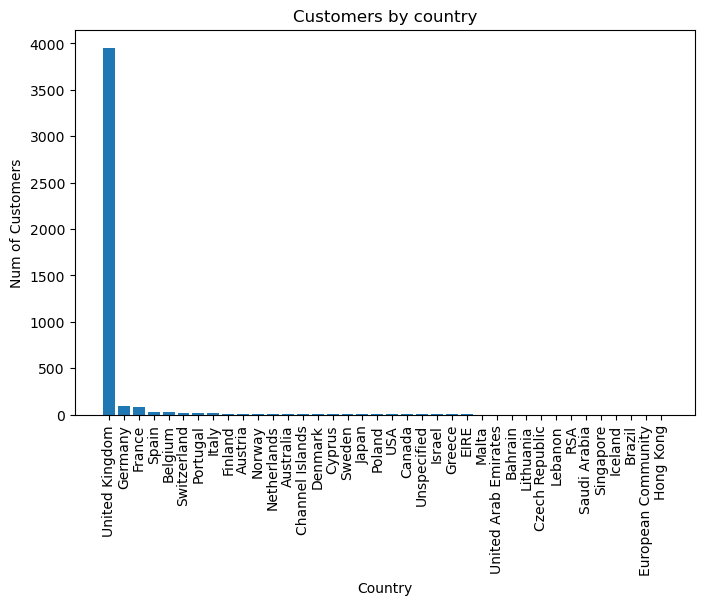

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(groupby_country['Country'],groupby_country['CustomerID']),
plt.title('Customers by country')
plt.xlabel('Country')
plt.ylabel('Num of Customers')
plt.xticks(rotation=90);

### I.3.b)  What's the total revenue generated per country?

In [34]:
data['revenue'] = data['Quantity']*data['UnitPrice']


In [43]:
rev_per_country = data.groupby('Country')['revenue'].sum().reset_index()

groupby_rev_cont = pd.DataFrame(rev_per_country).sort_values(by='revenue',
                                                            ascending=False)
groupby_rev_cont


,Country,revenue
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


We observe that UK has highest revenue generated and largest customer base.

In [44]:
groupby_rev_cont.columns

Index(['Country', 'revenue'], dtype='object')

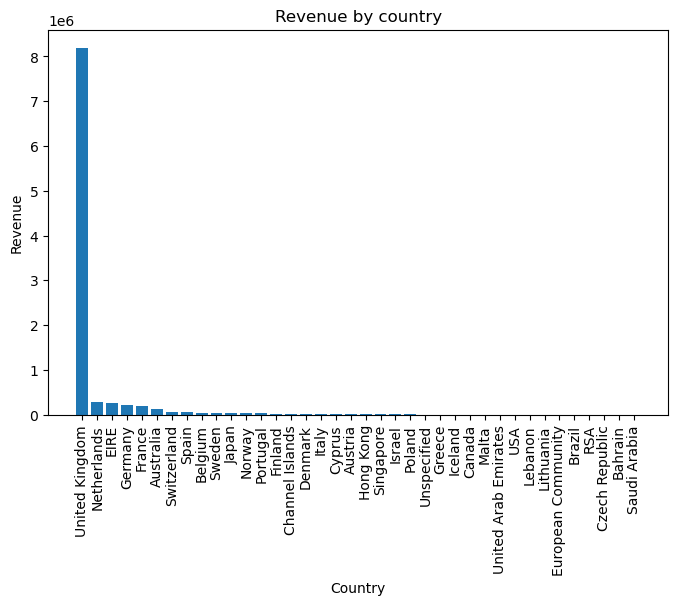

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(groupby_rev_cont['Country'],groupby_rev_cont['revenue']),
plt.title('Revenue by country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=90);

# Reference

1. Check non-numeric values - https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html